In [25]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.shape
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [27]:
labels=df.v1
labels.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [28]:
x_train,x_test,y_train,y_test=train_test_split(df['v2'], labels, test_size=0.2, random_state=7)

In [29]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [30]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)

In [42]:
confusion_matrix(y_test,y_pred, labels=['spam','ham'])

array([[131,  14],
       [  6, 964]])

<function matplotlib.pyplot.show>

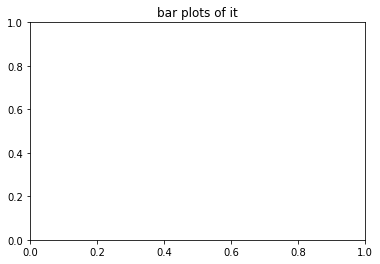